In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.patches import FancyArrowPatch

Considerando los dos activos, y los dos estados del modelo M donde el activo 1 es el bono B y el activo 2 es la accion S:
El caso especial de economia simple con $B_0=100$ y $B_T=103$, $S_0=100$ y $S_T^u=130$ y $S_T^d=90$.

El vector de retorno al tiempo $t=T$ de los portafolios $\vec{\pi}$ 


In [2]:
# Row matrix of t=0 prices (B_0 and S_0)
A0 = np.array([[100, 100]])
asset_names = ['Bond', 'Stock']

In [3]:
A = np.array([
    [103, 90],   # Payoff_T_d
    [103, 130]   # Payoff_T_u
])

state_names = ['Payoff_T_d', 'Payoff_T_u']

In [4]:
A_df = pd.DataFrame(A, index=state_names, columns=asset_names)
print(A_df)

            Bond  Stock
Payoff_T_d   103     90
Payoff_T_u   103    130


In [6]:
A_transpose_df = pd.DataFrame(
    A.T, 
    index=asset_names, 
    columns=state_names
)
A_transpose_df['Asset_name'] = A_transpose_df.index

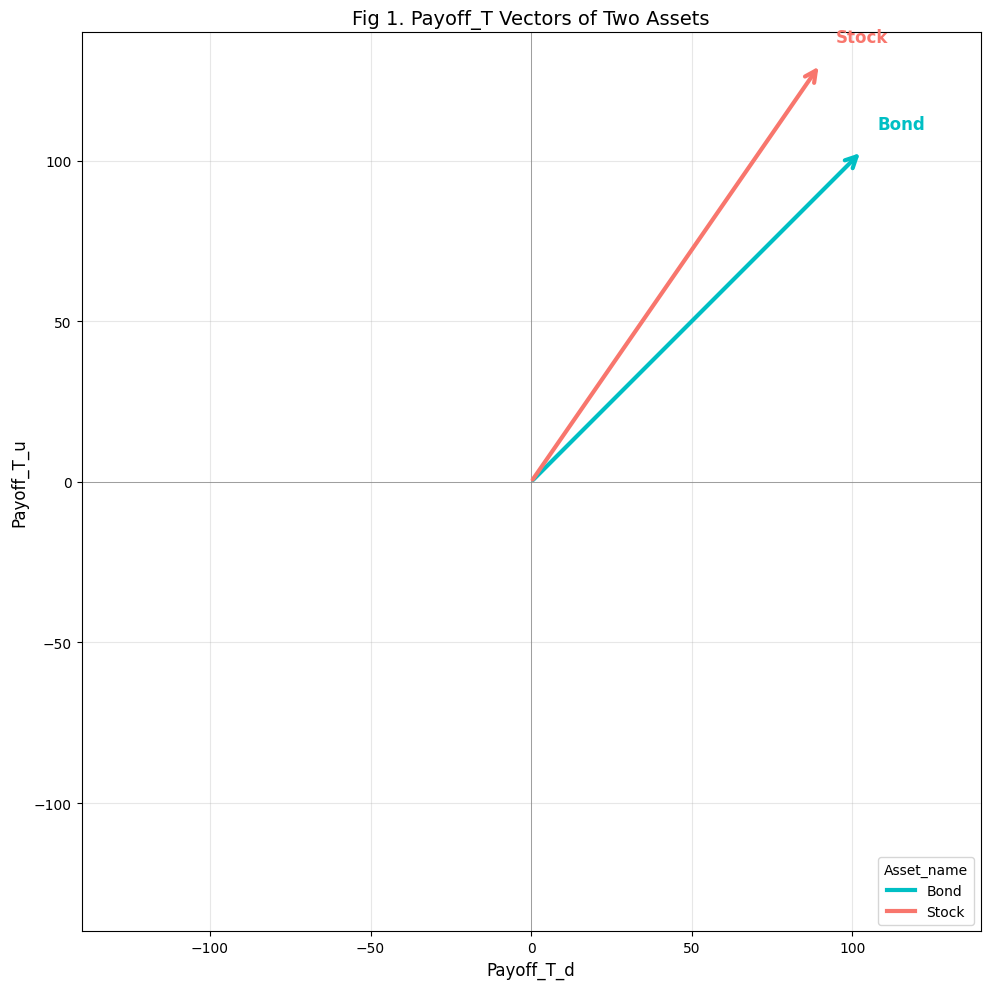

In [8]:
fig, ax = plt.subplots(figsize=(10, 10))

# Colors for each asset
colors = {'Bond': '#00BFC4', 'Stock': '#F8766D'}  # Similar to ggplot2 defaults

# Plot vectors as arrows from origin to payoff point
for idx, row in A_transpose_df.iterrows():
    x_end = row['Payoff_T_d']
    y_end = row['Payoff_T_u']
    asset = row['Asset_name']
    
    # Draw arrow
    ax.annotate(
        '', 
        xy=(x_end, y_end), 
        xytext=(0, 0),
        arrowprops=dict(
            arrowstyle='->', 
            color=colors[asset], 
            lw=3,
            mutation_scale=20
        )
    )
    
    # Add label
    ax.text(
        x_end + 5, 
        y_end + 7, 
        asset, 
        fontsize=12, 
        color=colors[asset],
        fontweight='bold'
    )

# Configure axes
ax.set_xlim(-140, 140)
ax.set_ylim(-140, 140)
ax.set_xlabel('Payoff_T_d', fontsize=12)
ax.set_ylabel('Payoff_T_u', fontsize=12)
ax.set_title('Fig 1. Payoff_T Vectors of Two Assets', fontsize=14)

# Add grid and axis lines
ax.axhline(y=0, color='gray', linewidth=0.5)
ax.axvline(x=0, color='gray', linewidth=0.5)
ax.grid(True, alpha=0.3)
ax.set_aspect('equal')

# Add legend
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], color=colors['Bond'], lw=3, label='Bond'),
    Line2D([0], [0], color=colors['Stock'], lw=3, label='Stock')
]
ax.legend(handles=legend_elements, title='Asset_name', loc='lower right')

plt.tight_layout()
plt.savefig('fig1_payoff_vectors.png', dpi=150, bbox_inches='tight')
plt.show()